# Занятие 4. Факторный анализ

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [59]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt

In [2]:
os.chdir("C:/Users/HP/Documents/analysis/Marketing/data/")

Будем анализировать поведение самцов корюшки:

LUNGES - количество нападений (удары) на модель самца.<br>
BITES - количество нападений (укусы) на модель самца.<br>
ZIGZAGS - плавание зигзагом, которое является частью поведения, направленного на привлечение самок.<br>
NEST - действия, связанные с построением гнезда.<br>
SPINES - число раз, когда топорщился колючий верхний плавник.<br>
DNEST - суммарная длительность времени, проведенного за построением гнезда.<br>
BOUT - количество элементов поведения, характеризующих готовность к схватке.<br>

In [3]:
df = pd.read_csv('stickleback.csv', sep=';', decimal=',')
df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.filter(regex='^(?!.*Unnamed).*$')
df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0


In [5]:
df.describe()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,131.185185,69.055556,7.277778,1.425926,18.425926,34.259259,89.314815
std,50.771064,43.428283,6.693891,3.000641,8.712606,56.491170,98.679742
min,41.000000,3.000000,0.000000,0.000000,5.000000,0.000000,6.000000
25%,99.000000,34.250000,2.250000,0.000000,14.000000,0.000000,23.500000
50%,127.000000,60.000000,5.000000,0.000000,16.000000,0.000000,45.000000
75%,156.750000,84.250000,10.750000,1.000000,24.750000,73.000000,125.000000
max,277.000000,175.000000,26.000000,15.000000,46.000000,199.000000,306.000000


In [6]:
df.corr()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
LUNGES,1.000000,0.688077,-0.139336,-0.164133,0.055567,-0.228568,0.233314
BITES,0.688077,1.000000,-0.042761,-0.148884,0.373382,-0.217563,0.117316
ZIGZAGS,-0.139336,-0.042761,1.000000,0.351894,0.067813,0.091315,-0.160693
NEST,-0.164133,-0.148884,0.351894,1.000000,-0.052538,0.514028,-0.305876
SPINES,0.055567,0.373382,0.067813,-0.052538,1.000000,-0.051099,-0.041483
DNEST,-0.228568,-0.217563,0.091315,0.514028,-0.051099,1.000000,-0.242177
BOUT,0.233314,0.117316,-0.160693,-0.305876,-0.041483,-0.242177,1.000000


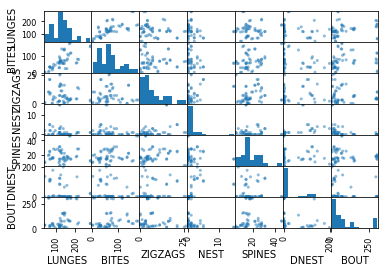

In [7]:
scatter_matrix(df);

Видим, что данные признаки далеки от нормальных, корреляции между ними не наблюдается. 

Рассчитаем критерии, позволяющие оценить возможность проведения факторного анализа.

In [8]:
#Bartlett’s Test
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(85.17614839099757, 4.23744230751294e-10)

p_value<0.05, что свидетельствует о надежном отличии корреляционной матрицы от единичной, т.е. о том, что признаки взаимосвязаны.

In [9]:
#Kaiser-Meyer-Olkin Test
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.5267816347722193

КМО>0.5, что говорит о возможности проведения факторного анализа.

In [10]:
kmo_all

array([0.49517671, 0.48565545, 0.53685554, 0.57271819, 0.33768629,
       0.61639292, 0.76130941])

3,4,6,7 признаки являются наиболее значимыми.

Выделим первоначальные факторы. Воспользуемся для этого методом главных компонент.

## Метод главных компонент

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
   


Cтандартизируем переменные. Из предварительного анализа видно, что это важно.

In [54]:
df_scaled = preprocessing.scale(df)

In [55]:
pca = PCA(n_components=7)
pca.fit(df_scaled)

PCA(n_components=7)

I used the sklearn PCA function. The return parameters 'components_' is eigen vectors and 'explained_variance_' is eigen values.
https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca

Посмотрим на собственные числа.

In [57]:
pca.explained_variance_

array([2.33131423, 1.48167964, 0.99758804, 0.90279779, 0.76745194,
       0.41244602, 0.2387978 ])

Видим, что у первых 2-х комонент собственные числа больше 1, у 3-й - близко к 1. Поэтому стоит рассмотреть 2-3 компоненты.

In [61]:
pca.explained_variance_ratio_

array([0.32687739, 0.20774873, 0.13987346, 0.12658276, 0.1076057 ,
       0.05782973, 0.03348223])

In [64]:
v=0
for i in pca.explained_variance_ratio_:
    v+=i
    print(v)

0.32687739176792635
0.5346261250218034
0.6744995808365257
0.8010823391610432
0.9086880347421142
0.9665177682091353
0.9999999999999999


Стоит оставить 3 компоненты (объясняют 67% дисперсии) или 4 компоненты (объясняют 80% дисперсии).

## Факторный анализ на основе пакета sklearn


http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

Проведем факторный анализ с выделением 3-х факторов.

In [17]:
fa = FactorAnalysis(n_components=3)
fa.fit(df_scaled)

FactorAnalysis(n_components=3)

Координаты факторов в пространстве старых признаков находятся в атрибуте ```components_```.

In [18]:
pd.DataFrame(fa.components_, columns=df.columns)

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,0.832106,0.851016,-0.180171,-0.390928,0.261270,-0.375792,0.267079
1,0.178973,0.241522,0.331612,0.808428,0.099520,0.441922,-0.266378
2,-0.301530,0.213190,0.145993,-0.051025,0.592552,-0.020361,-0.175361


Из факторной структуры видим, что первый (нулевой) фактор сильно коррелирует с признаками-нападениями (ударами и укусами), так что его можно интерпретировать, как агрессивность самца. Второй же фактор, напротив, коррелирует с признаками, связанными с обустройство гнезда, что можно расценивать как "домовитость", а вот третий фактор интерпретировать уже сложно. Он коррелирует только с одним признаком SPINES, а значит, не несёт какой-то новой информации. Так что попробуем оставить только два фактора.

In [19]:
fa = FactorAnalysis(n_components=2)
fa.fit(df_scaled)

FactorAnalysis(n_components=2)

In [20]:
pd.DataFrame(fa.components_, columns=df.columns)

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,0.715035,0.956805,-0.086423,-0.241141,0.358615,-0.282219,0.166892
1,-0.019296,0.098533,0.367721,0.848657,0.073328,0.513705,-0.329849


Факторы сохранили свой смысл - агрессивность и домовитость. Таким образом, мы свели пространство из семи признаков к двум новым интерпретируемым факторам.

Посмотрим на необъяснимую составляющую исходных данных. Уникальность - часть дисперсии переменной, объясненной уникальными факторами (чем больше, тем хуже объясняется факторами). Она содержится в атрибуте ```noise_variance_```.

In [21]:
print('Uniqueness:')
pd.Series(fa.noise_variance_, df.columns)

Uniqueness:


LUNGES     0.487766
BITES      0.076163
ZIGZAGS    0.857251
NEST       0.222906
SPINES     0.866169
DNEST      0.656093
BOUT       0.863093
dtype: float64

Наконец, сами факторы можно получить, применив метод ```transform```.

In [22]:
scores = pd.DataFrame(fa.transform(df_scaled), columns=['factor1', 'factor2'])
scores.head()

,factor1,factor2
0,-0.938788,-0.776068
1,-0.159453,-0.591389
2,-0.818776,-0.458188
3,1.444012,0.094633
4,-0.638620,3.662073


Корреляция между факторами близка к нулю, при этом в них сосредоточена почти вся информация признаков, поэтому они идеальные переменные для регрессионного анализа.

# Факторный анализ на основе пакета factor_analyzer

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [65]:
fa = FactorAnalyzer()
fa.fit(df_scaled)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([2.28814174, 1.45424113, 0.97911419, 0.88607931, 0.75323987,
       0.40480813, 0.23437562])

Видим, что только у 2-х факторов собственное значение больше 1.

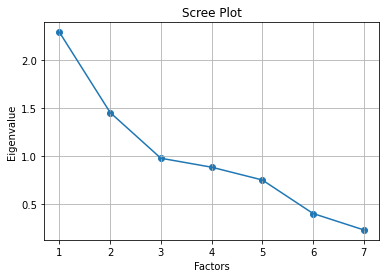

In [84]:
# Create scree plot using matplotlib
plt.scatter(range(1,df_scaled.shape[1]+1),eigen_values)
plt.plot(range(1,df_scaled.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [74]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors=3, rotation='varimax')
fa.fit(df_scaled)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [75]:
#Матрица факторных нагрузок - значения коэффициентов корреляции между переменными и факторами.
loadings = pd.DataFrame(fa.loadings_, columns=['factor1', 'factor2','factor3'], index=df.columns)
loadings

,factor1,factor2,factor3
LUNGES,-0.213815,0.876088,0.022384
BITES,-0.110001,0.742419,0.588652
ZIGZAGS,0.342123,-0.076383,0.107402
NEST,0.989281,0.058242,-0.141253
SPINES,0.025750,0.057196,0.564226
DNEST,0.501341,-0.134760,-0.111540
BOUT,-0.359746,0.185878,-0.089865


Из факторной структуры видим, что первый фактор сильно коррелирует с признаками, связанными с обустройством гнезда (NEST, DNEST), что можно расценивать как "домовитость". Второй фактор сильно коррелирует с признаками-нападениями (ударами и укусами - LUNGES, BITES), так что его можно интерпретировать, как агрессивность самца. Третий коррелирует, помимо,  признаками агрессивности (BITES и SPINES), а значит, не несёт какой-то новой информации. Так что попробуем оставить только два фактора.

In [76]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors=2, rotation='varimax')
fa.fit(df_scaled)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [77]:
#Матрица факторных нагрузок - значения коэффициентов корреляции между переменными и факторами.
loadings = pd.DataFrame(fa.loadings_, columns=['factor1', 'factor2'], index=df.columns)
loadings

,factor1,factor2
LUNGES,0.623123,-0.242540
BITES,1.007741,-0.128163
ZIGZAGS,0.000196,0.355506
NEST,-0.015454,0.894196
SPINES,0.294315,0.018574
DNEST,-0.155512,0.536576
BOUT,0.099458,-0.384636


Факторы сохранили свой смысл - агрессивность (фактор 1) и домовитость (фактор 2). Таким образом, мы свели пространство из семи признаков к двум новым интерпретируемым факторам.

In [47]:
#Общность - часть дисперсии переменной, объясненной факторами. Это сумма квадратов по строке в матрице факторных нагрузок.
fa.get_communalities()

array([0.4471078 , 1.03196785, 0.1263845 , 0.79982594, 0.08696602,
       0.31209807, 0.15783688])

In [45]:
#Уникальность - часть дисперсии переменной, объясненной уникальными факторами.
fa.get_uniquenesses()

array([ 0.5528922 , -0.03196785,  0.8736155 ,  0.20017406,  0.91303398,
        0.68790193,  0.84216312])

In [46]:
fa.get_communalities()+fa.get_uniquenesses()

array([1., 1., 1., 1., 1., 1., 1.])

In [42]:
sum(loadings['factor1'])

1.5247598524839108

Интерпретация:

In [39]:
# Get variance of each factors
var = pd.DataFrame(fa.get_factor_variance(), columns=['factor1', 'factor2'],index=['SS Loadings','Proportion Var','Cumulative Var'])
var

,factor1,factor2
SS Loadings,1.524760,1.437427
Proportion Var,0.217823,0.205347
Cumulative Var,0.217823,0.423170


The “SS loadings” row is the sum of squared loadings. 

 SS loadings - это сумма квадратов по столбцу в матрице факторных нагрузок. Это "собственное значение" в таблице 16.2 из лекции.

Proportion Var: tells us how much of the overall variance the factor accounts for out of all the variables.

 Proportion Var — доля дисперсии, объясняемая каждым фактором.

Cumulative Var — кумулятивная доля дисперсии.

Примерно 42% накопленной дисперсии объясняется 2-мя факторами.

Наконец, сами факторы можно получить, применив метод ```fit_transform```.

In [80]:
scores = pd.DataFrame(fa.fit_transform(df_scaled), columns=['factor1', 'factor2'])
scores.head()

,factor1,factor2
0,-1.056267,-0.414067
1,-0.312892,-0.554501
2,-0.914928,-0.217825
3,1.815168,-0.179745
4,0.413355,3.843151


In [83]:
scores.corr()

,factor1,factor2
factor1,1.000000,-0.004571
factor2,-0.004571,1.000000


Корреляция между факторами близка к нулю, при этом в них сосредоточена почти вся информация признаков, поэтому они идеальные переменные для регрессионного анализа.